**Mount Drive**

**https://github.com/RZ-19/Road_Damage_detection_using_yolov8?tab=readme-ov-file**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
import glob

In [4]:
from IPython.display import Image, display

In [5]:
!nvidia-smi

Wed Jan 17 18:04:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


In [8]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [9]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
from PIL import Image
from collections import deque
from ultralytics import YOLO
from IPython.display import Video

In [10]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [11]:
# Define the dataset_path
dataset_path = '/content/drive/MyDrive/final_pothole_detection/Potholes_dataset'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, '/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Potholes
nc: 1
roboflow:
  license: Private
  project: potholes_dataset
  url: https://app.roboflow.com/riaz-khan-bqqyr/potholes_dataset/1
  version: 1
  workspace: riaz-khan-bqqyr
test: /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test
train: /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/train
val: /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/valid



In [12]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)
# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'):
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 610
Number of validation images: 35
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


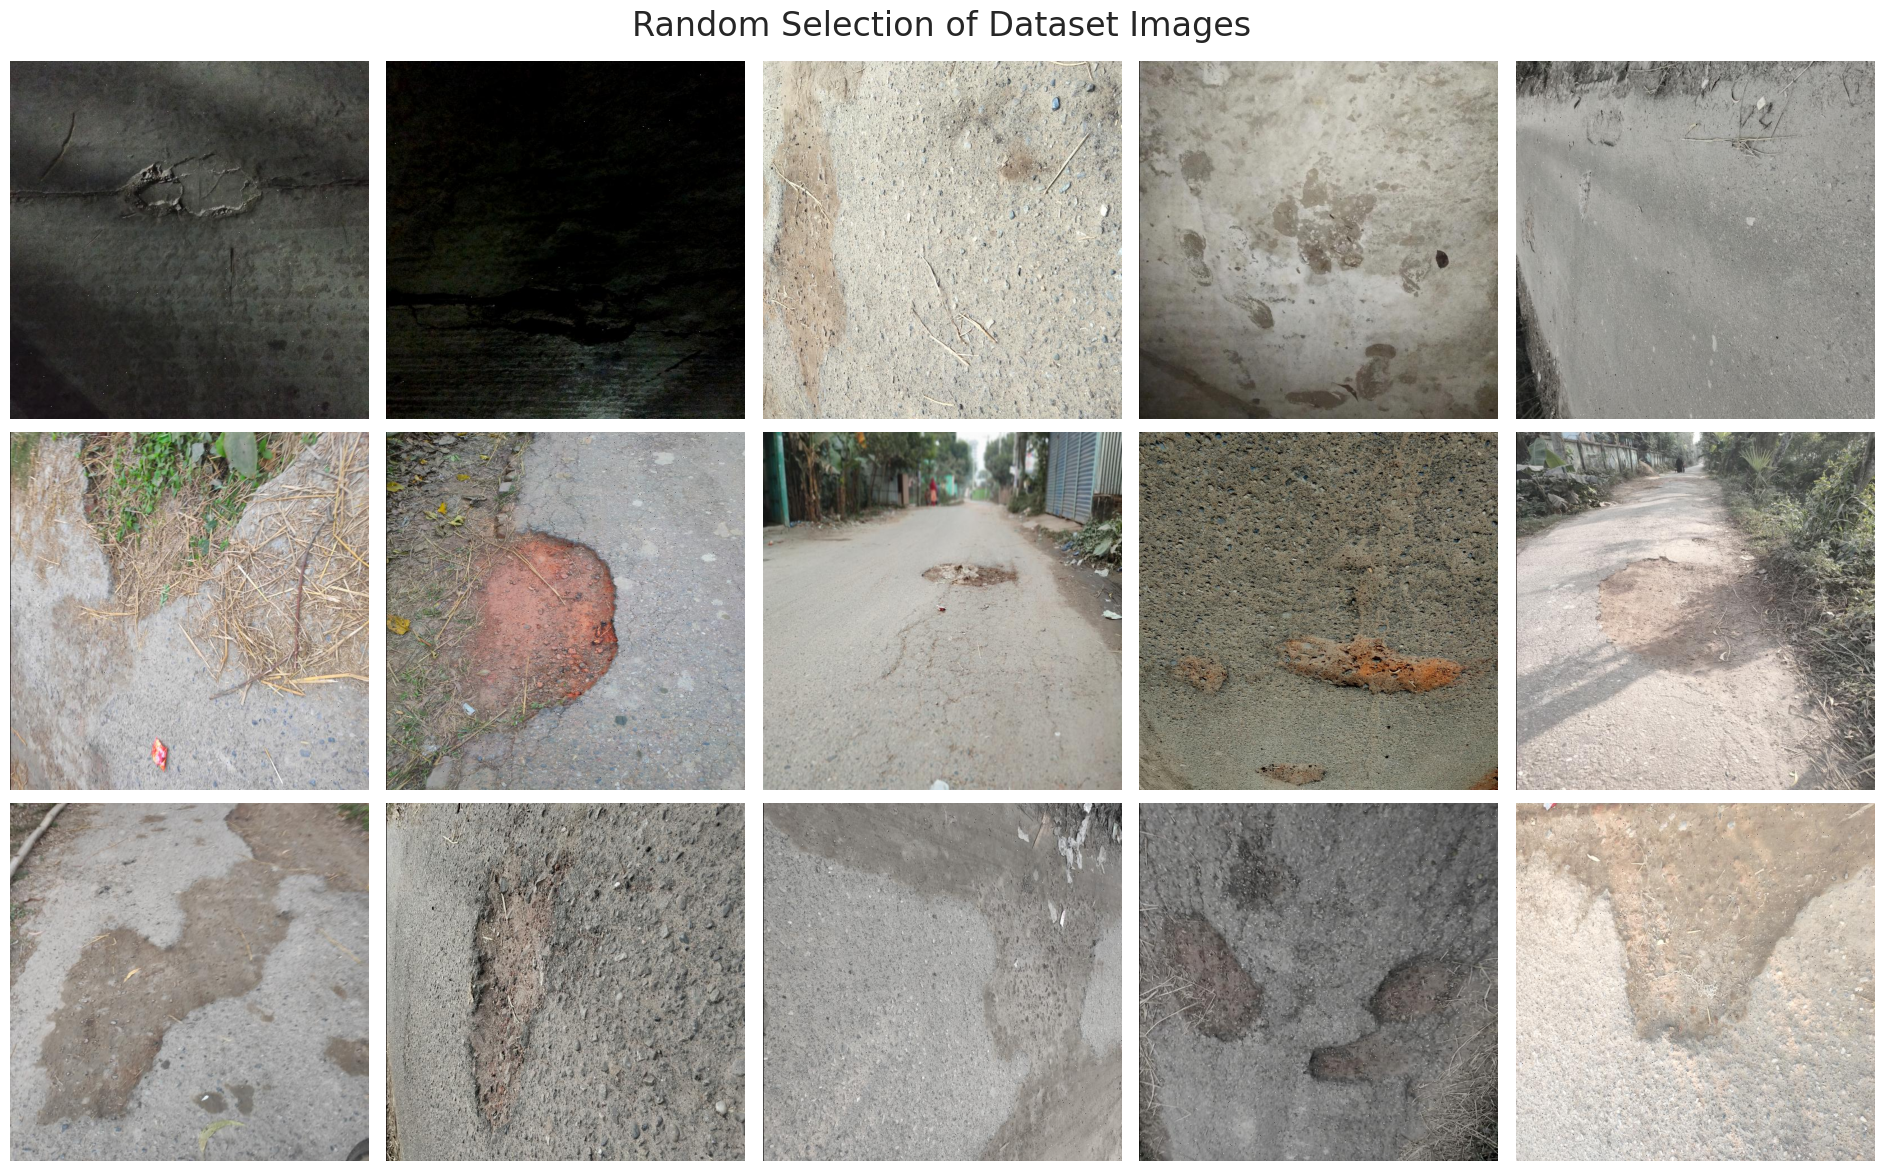

In [13]:
# Set the seed for the random number generator
random.seed(0)

# Create a list of image files
image_files = [f for f in os.listdir(train_images_path) if f.endswith('.jpg')]

# Randomly select 15 images
random_images = random.sample(image_files, 15)

# Create a new figure
plt.figure(figsize=(19, 12))

# Loop through each image and display it in a 3x5 grid
for i, image_file in enumerate(random_images):
    image_path = os.path.join(train_images_path, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

# Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

# Deleting unnecessary variable to free up memory
del image_files

**Training Data in Yolov8m Models**

In [14]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml epochs=100 imgsz=640 save=True

/content
100% 49.7M/49.7M [00:00<00:00, 328MB/s]
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

In [15]:
!ls /content/runs/detect/train

args.yaml					    PR_curve.png	 train_batch3511.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch3512.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1705515052.17500cbe05f3.3166.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	 val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	 weights
P_curve.png					    train_batch3510.jpg


**Show Training Confusion Matrix**

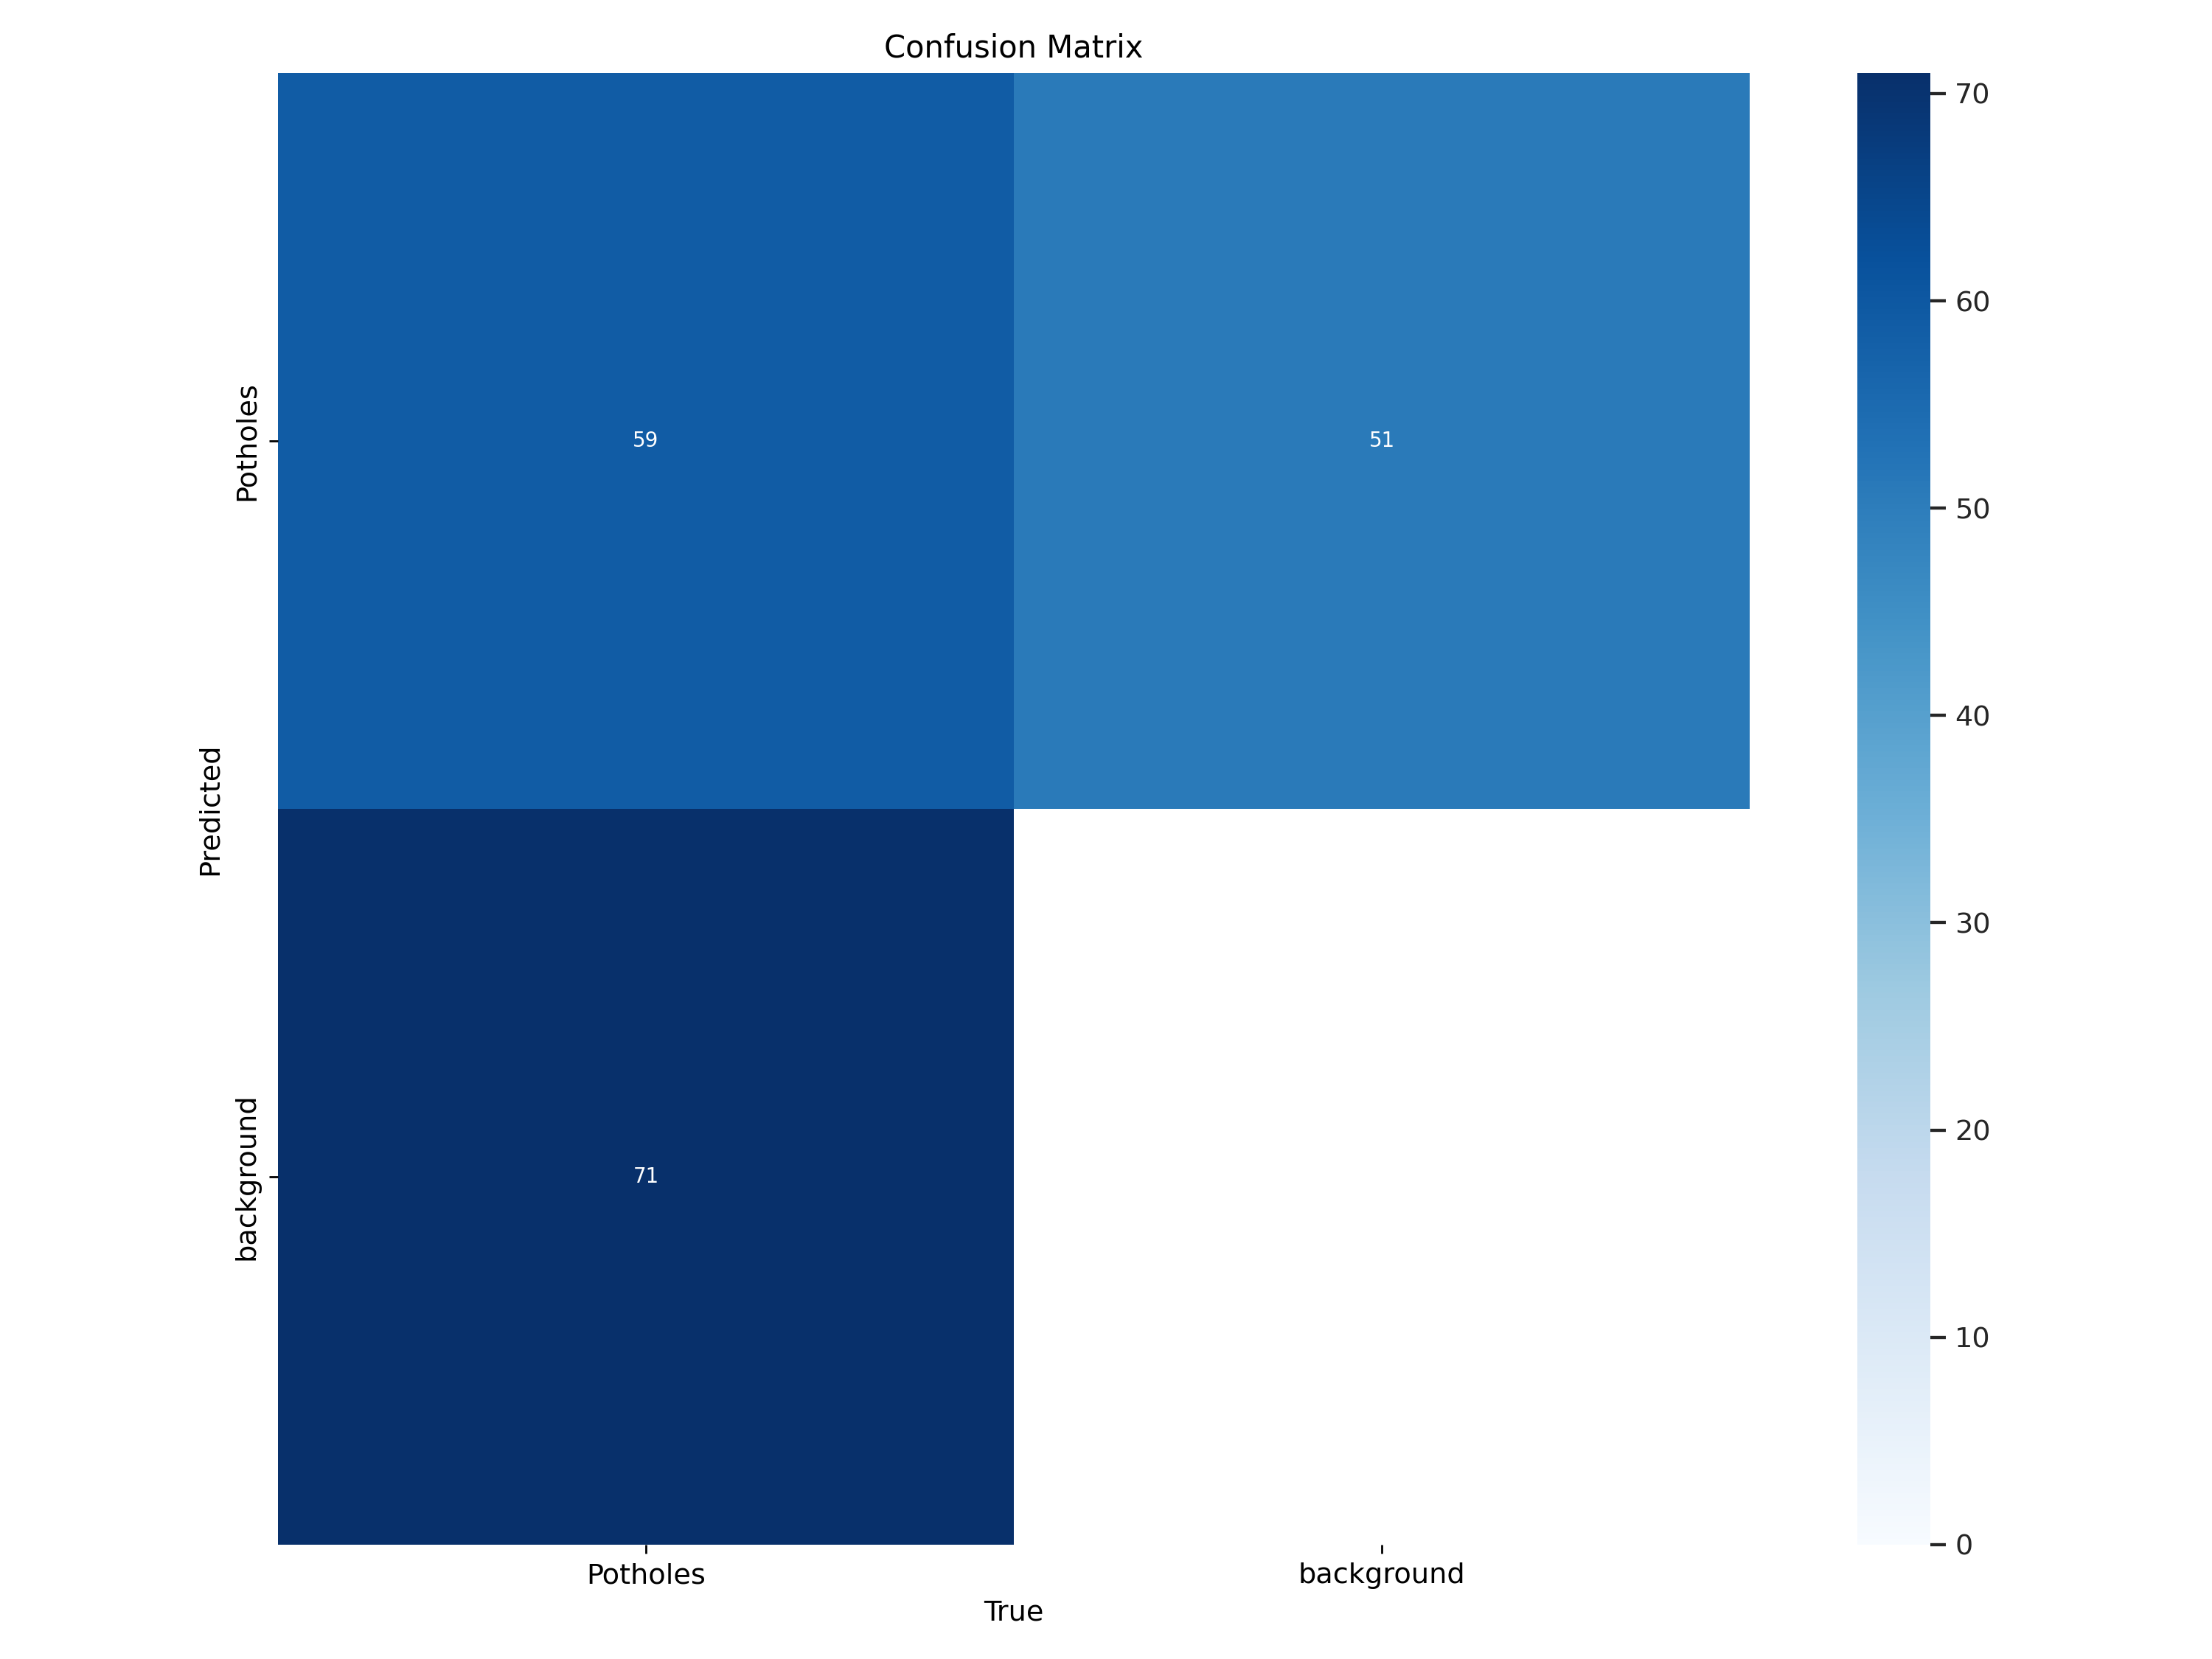

In [21]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = '/content/runs/detect/train/confusion_matrix.png'

# Display the image
display(Image(filename=image_path))


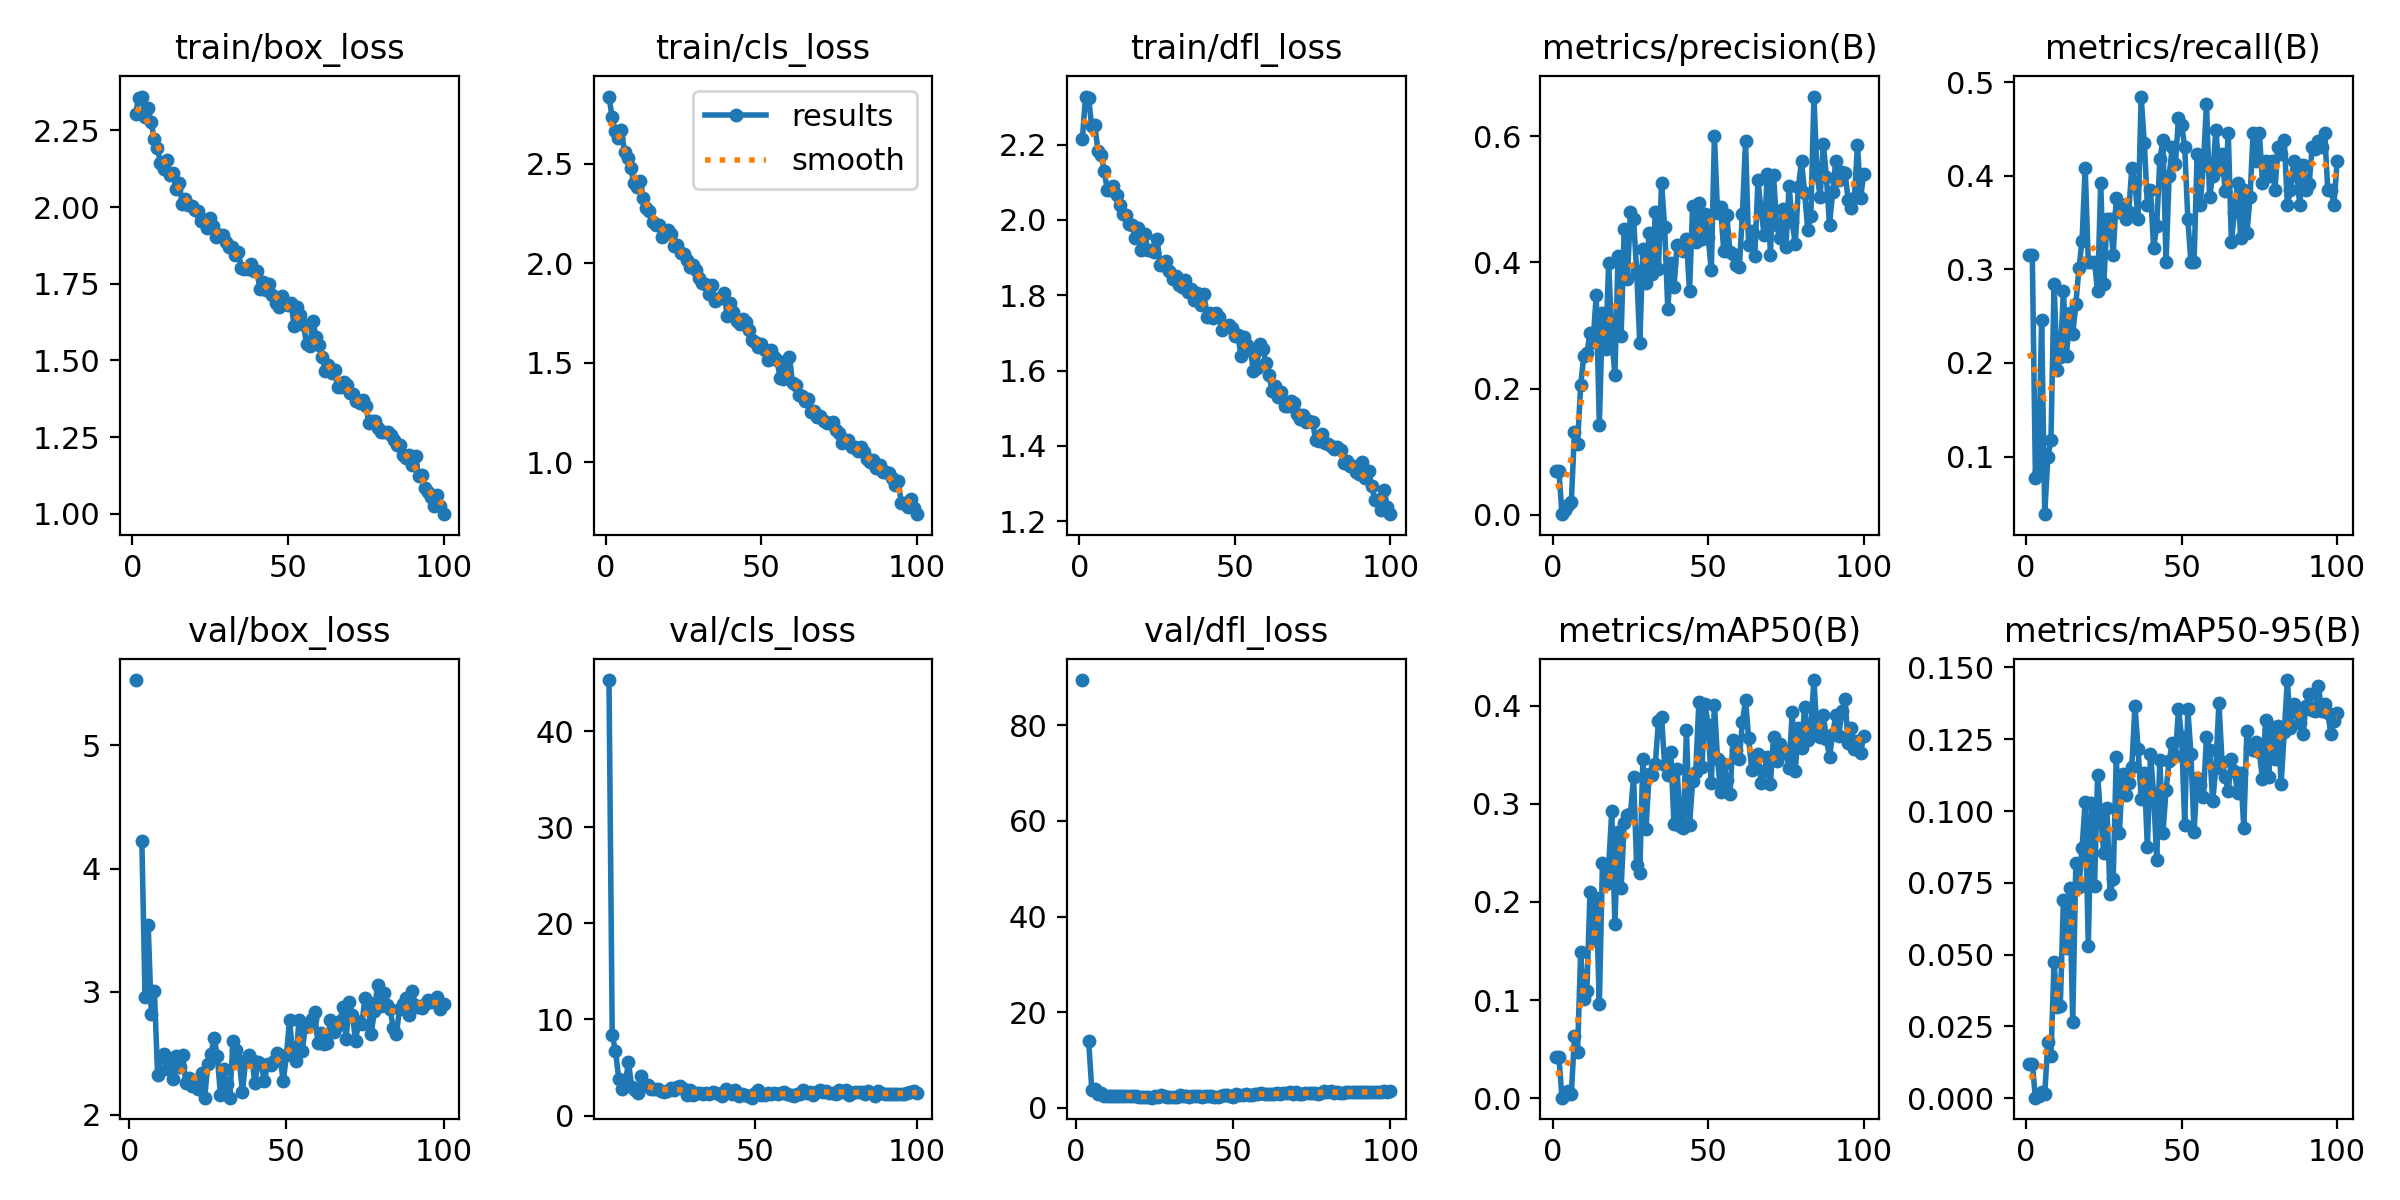

In [20]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = '/content/runs/detect/train/results.png'

# Display the image
display(Image(filename=image_path))


/content


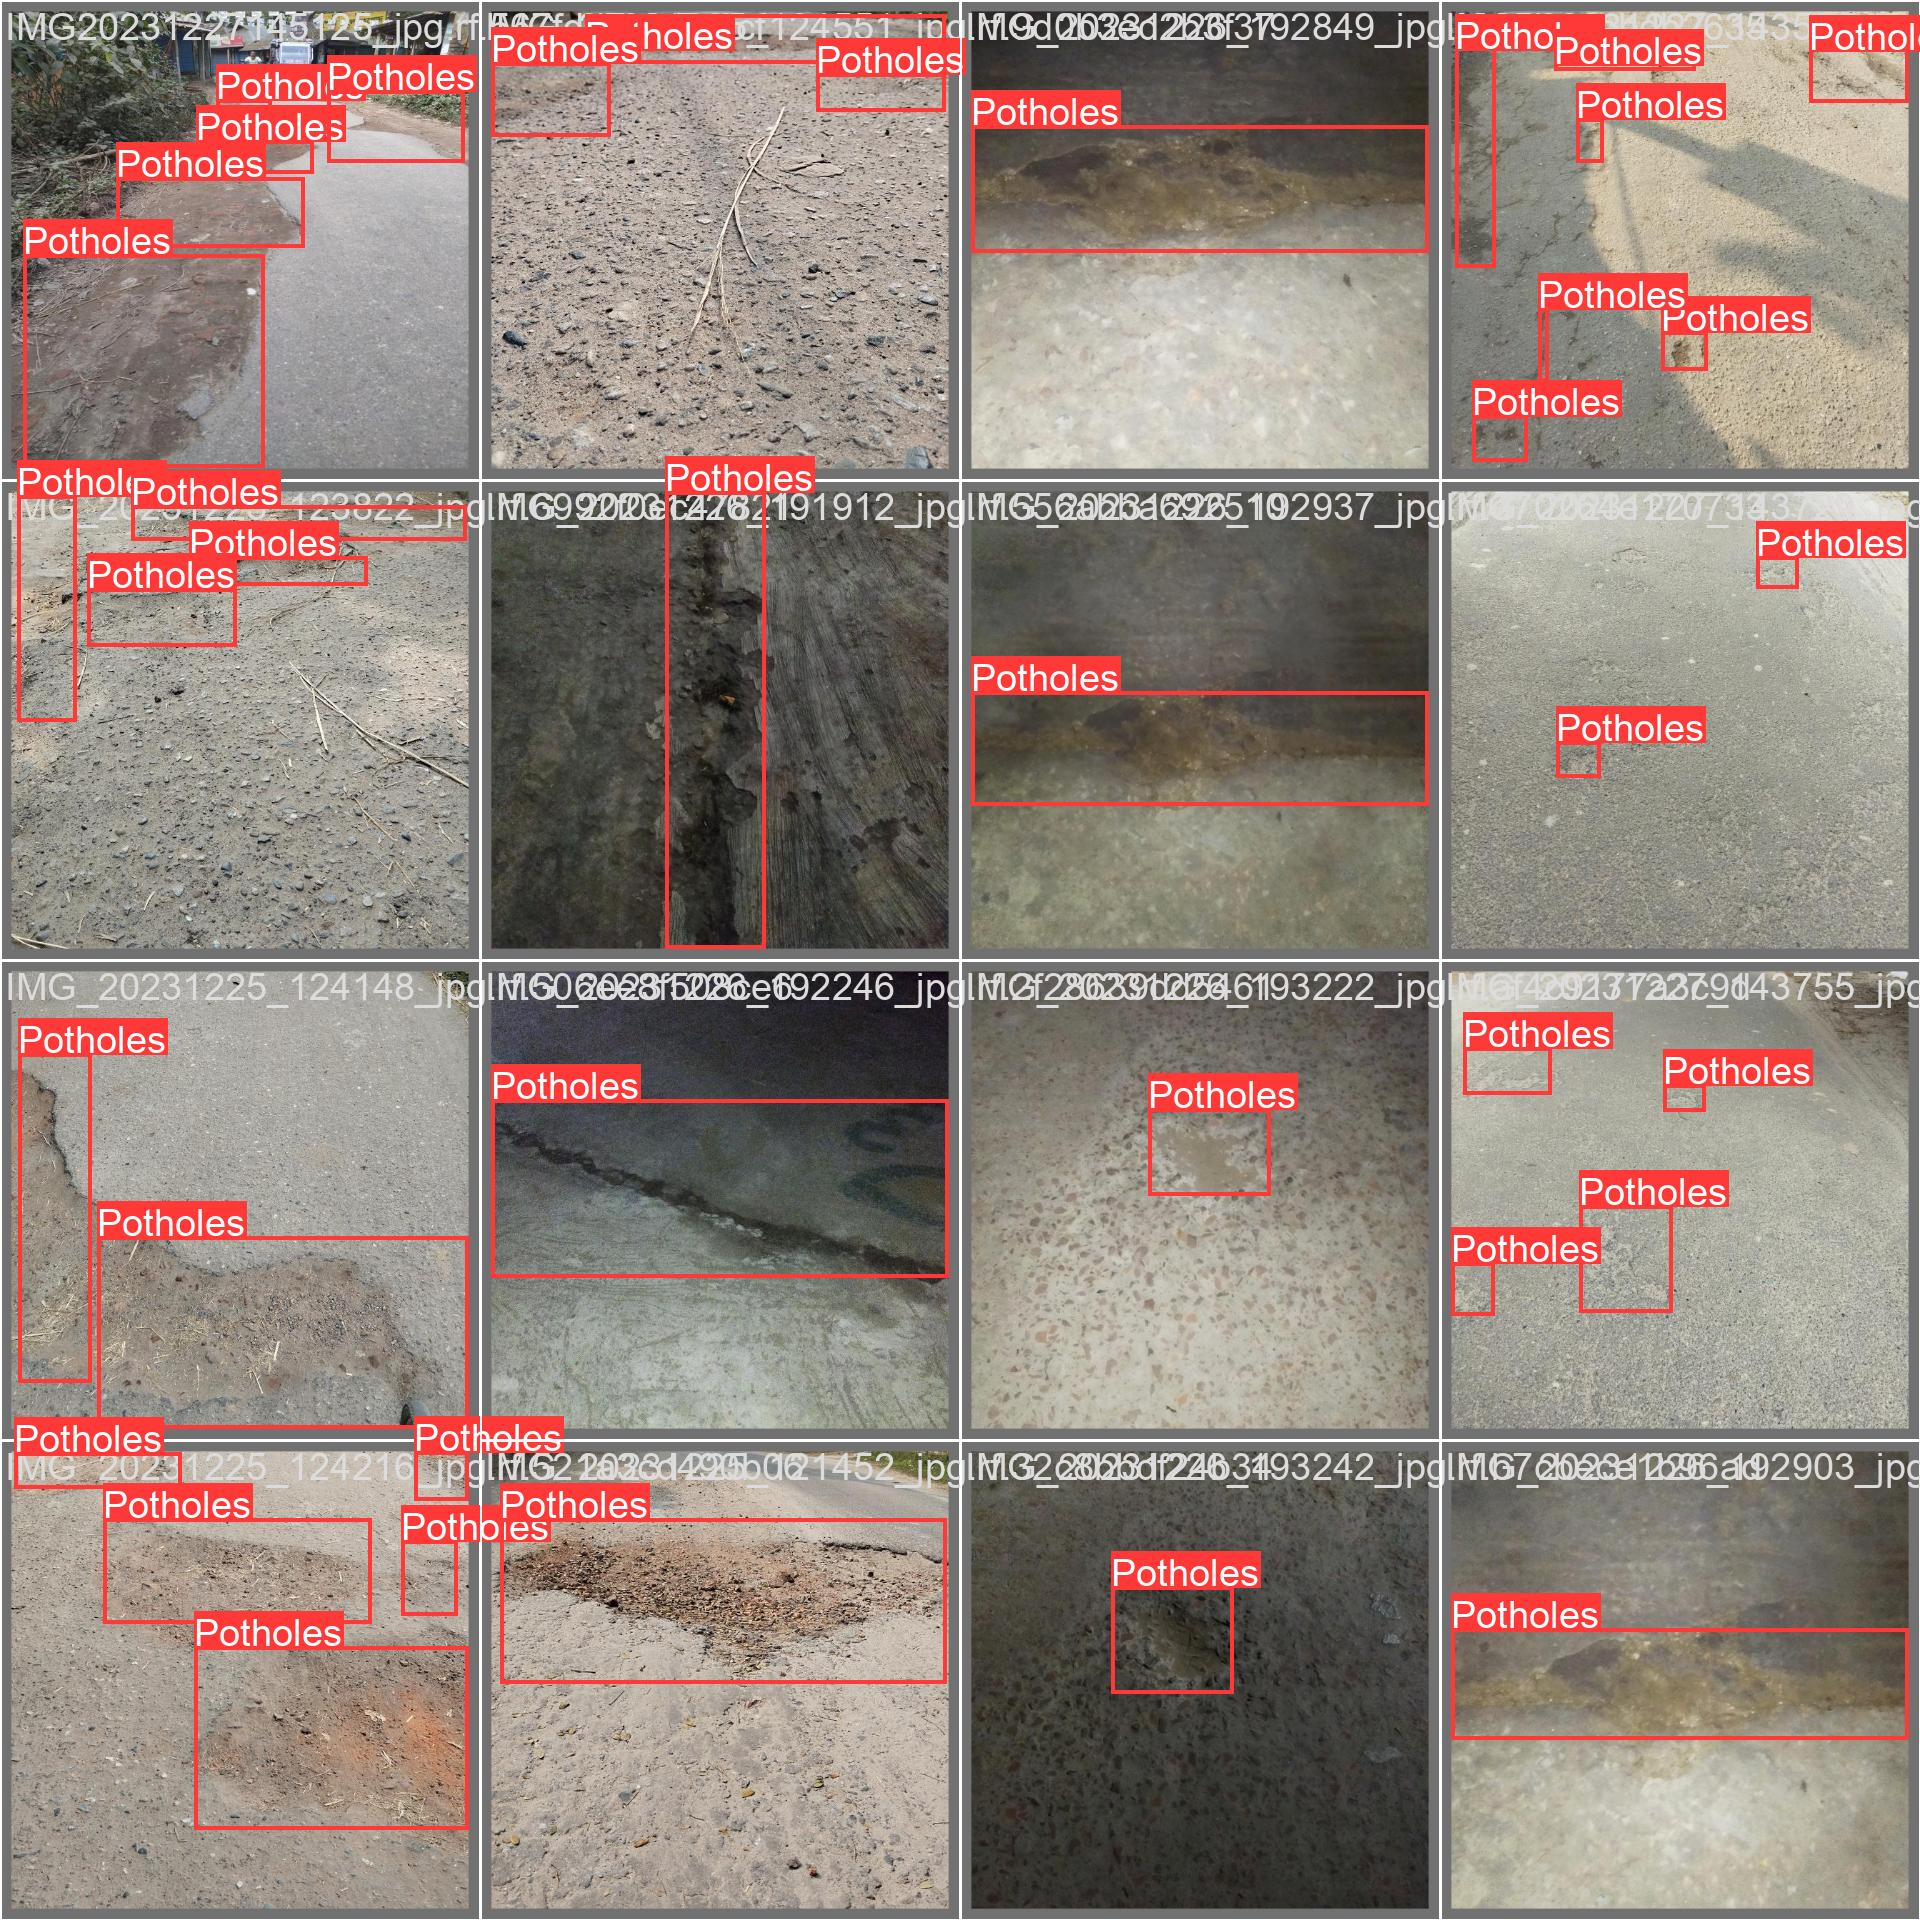

In [22]:
%cd {HOME}

Image(filename = f'/content/runs/detect/train/val_batch0_labels.jpg', width = 600)

In [27]:
%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/data.yaml save=True

/content
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100% 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.31s/it]
                   all         35        130      0.663      0.369      0.426      0.148
Speed: 4.3ms preprocess, 44.9ms inference, 0.0ms loss, 25.8ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


/content


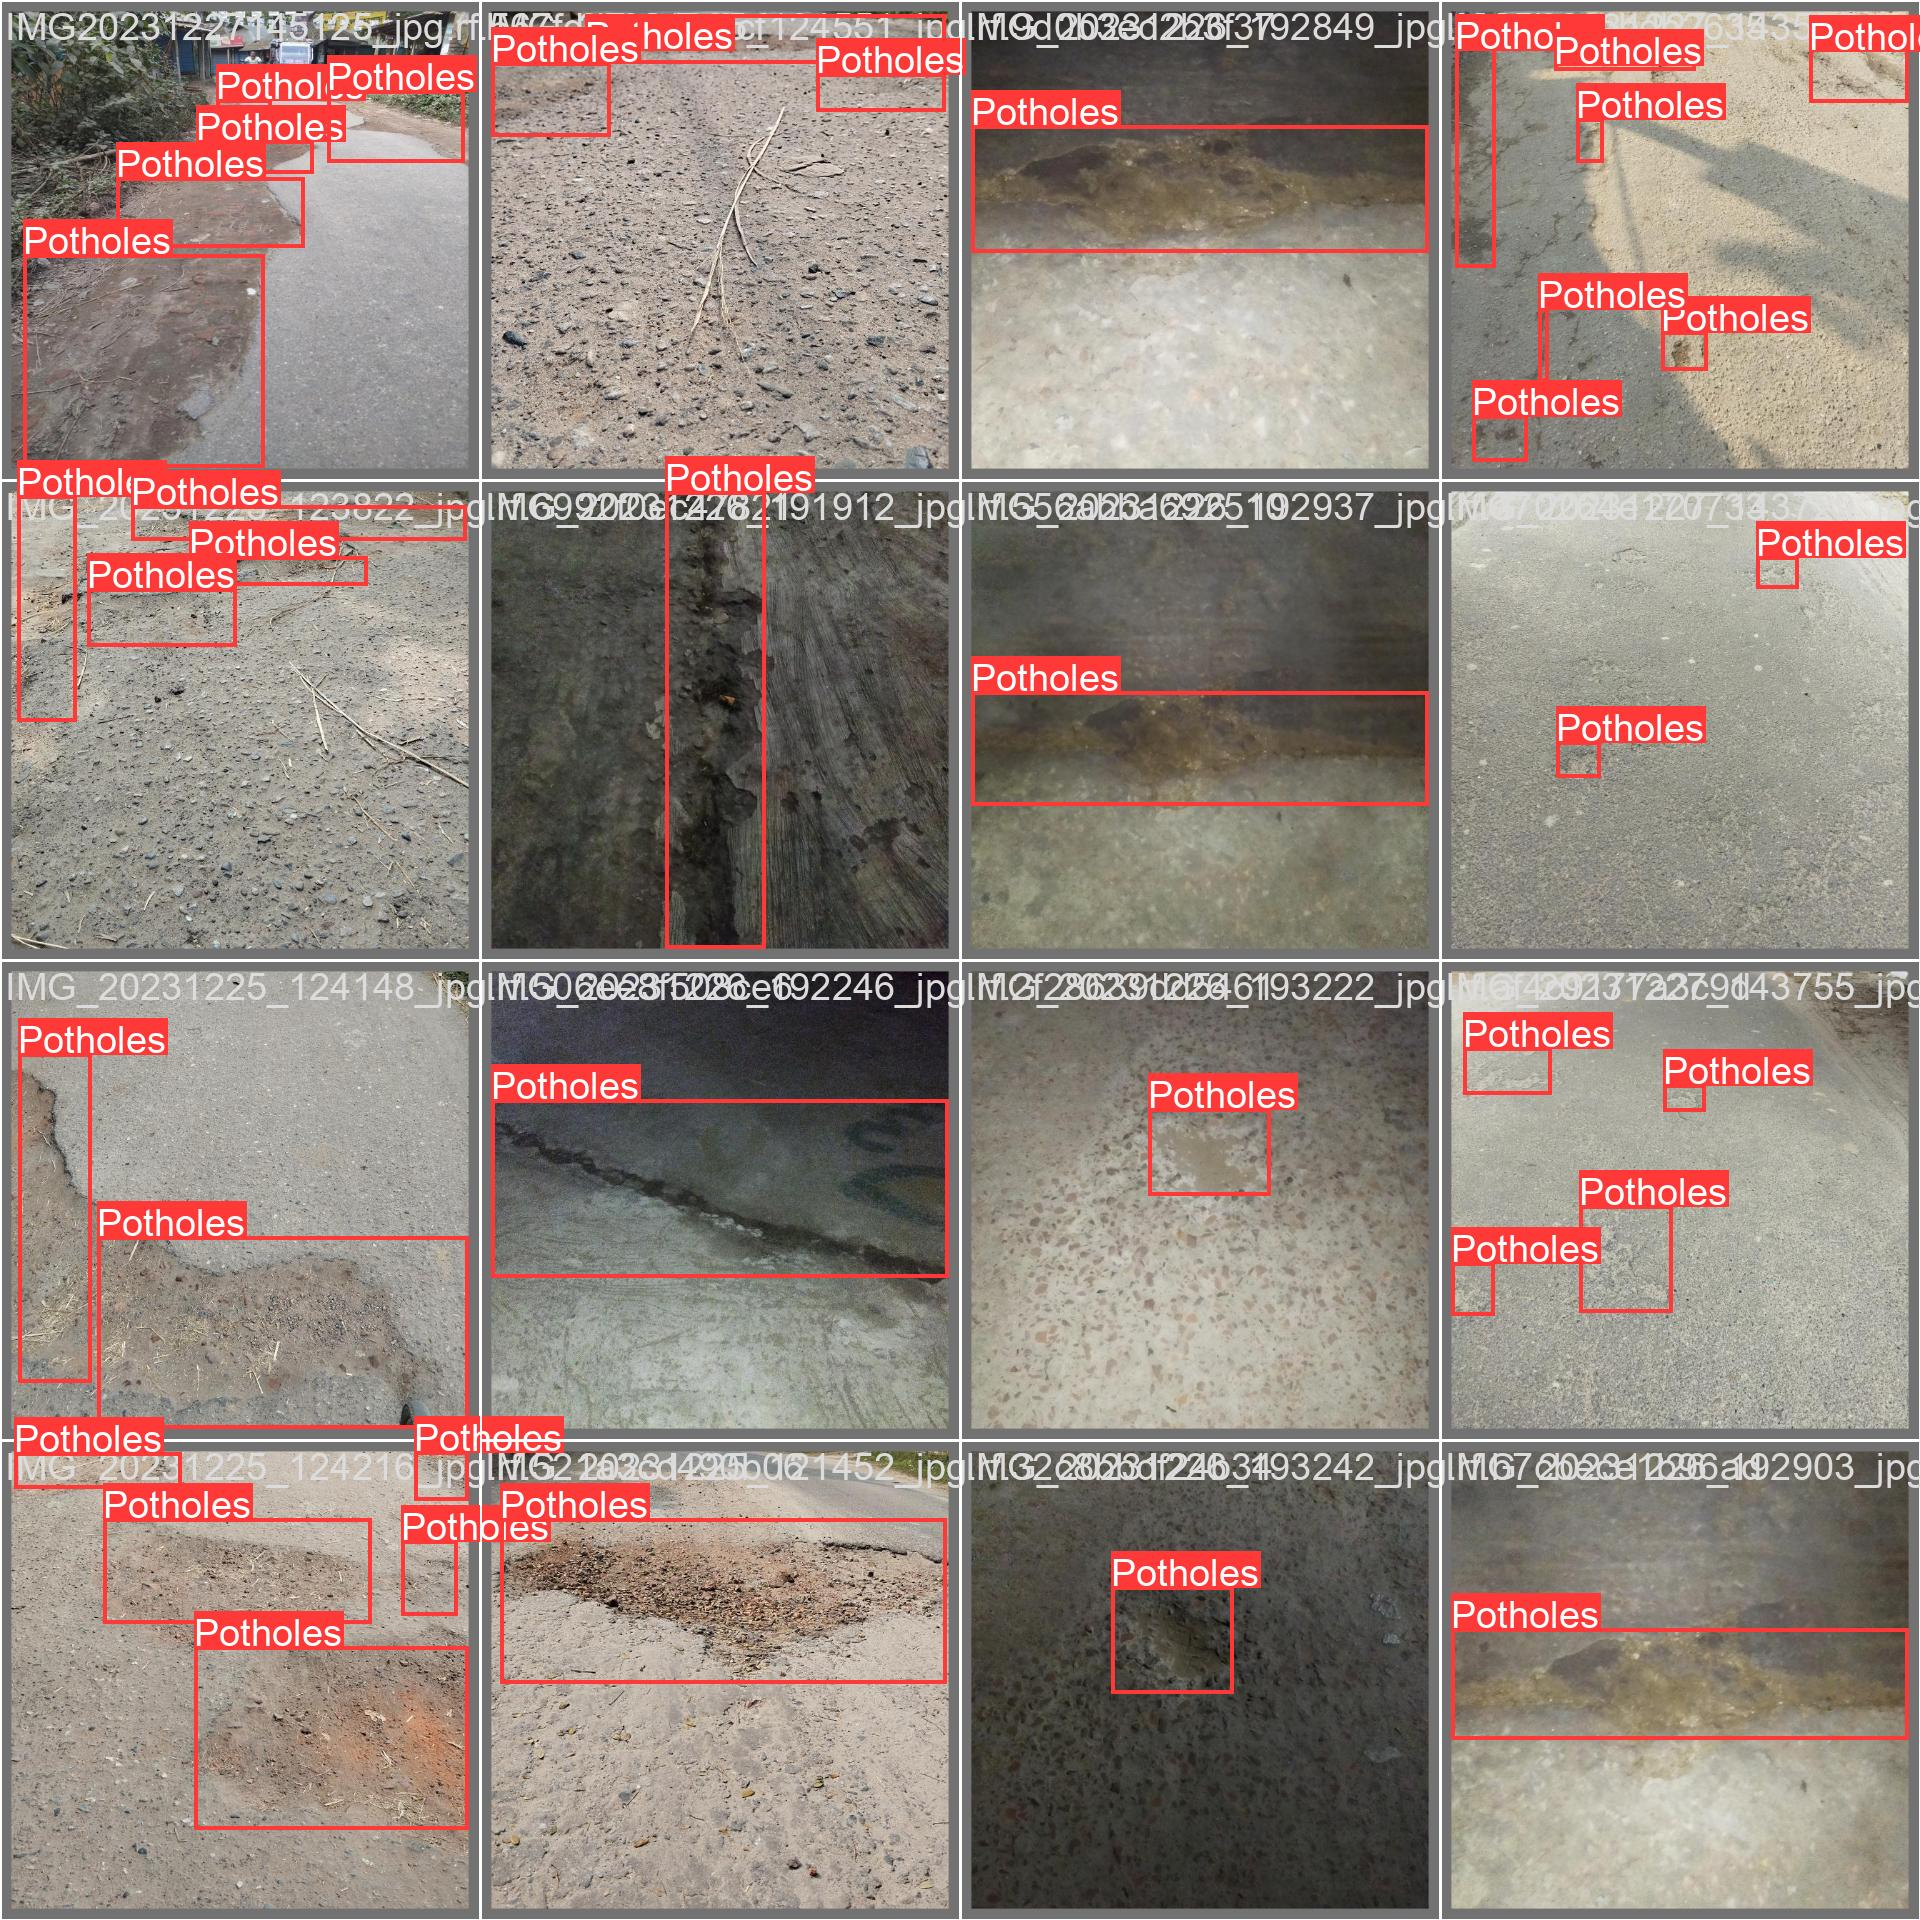

In [32]:
%cd {HOME}

Image(filename = f'/content/runs/detect/val/val_batch0_labels.jpg', width = 600)

In [33]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images save=True

/content
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227145232_jpg.rf.4f1a66a3729286f80fd3b3e9162e64ab.jpg: 640x640 11 Potholess, 37.1ms
image 2/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227145703_jpg.rf.e02425e716abd809bce2f9d34aaf0b9d.jpg: 640x640 4 Potholess, 37.1ms
image 3/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227150538-1-_jpg.rf.47c6ceab1af94ac7f5da2476da6263fc.jpg: 640x640 7 Potholess, 37.1ms
image 4/18 /content/drive/MyDrive/final_pothole_detection/Potholes_dataset/test/images/IMG20231227150800-1-_jpg.rf.476f49e7d3a4265026bf5278b3fc6246.jpg: 640x640 6 Potholess, 37.1ms
image 5/18 /content/drive/MyDrive/final_pothole_detection/Poth

In [34]:
from PIL import Image

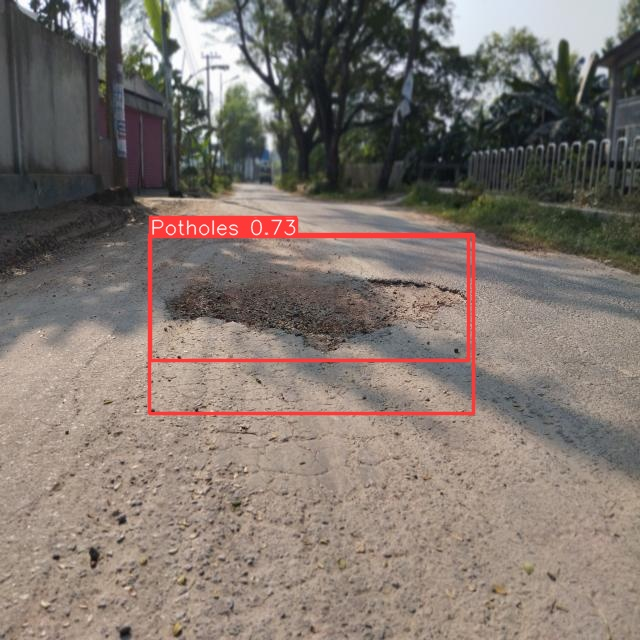

In [35]:
Image.open('/content/runs/detect/predict/IMG_20231224_142200_jpg.rf.4120fc82b402e76863e9c45778dc6a86.jpg')

In [36]:
from PIL import Image
from ultralytics import YOLO
import ultralytics
import numpy as np
from cv2 import imread
from matplotlib import pyplot as plt
from matplotlib.image import imread

In [37]:
# Load a pretrained YOLOv8n model
model = YOLO('/content/drive/MyDrive/final_pothole_detection/best.pt')

In [38]:
# Run inference on '.jpg'
results = model('/content/drive/MyDrive/final_pothole_detection/road damage.jpeg',show_conf=False,save=True)  # results list


image 1/1 /content/drive/MyDrive/final_pothole_detection/road damage.jpeg: 448x640 6 Potholess, 75.7ms
Speed: 3.6ms preprocess, 75.7ms inference, 558.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2


In [39]:
# Load the predicted image
predicted_img_path = '/content/drive/MyDrive/final_pothole_detection/road damage.jpeg'
predicted_img = imread(predicted_img_path)

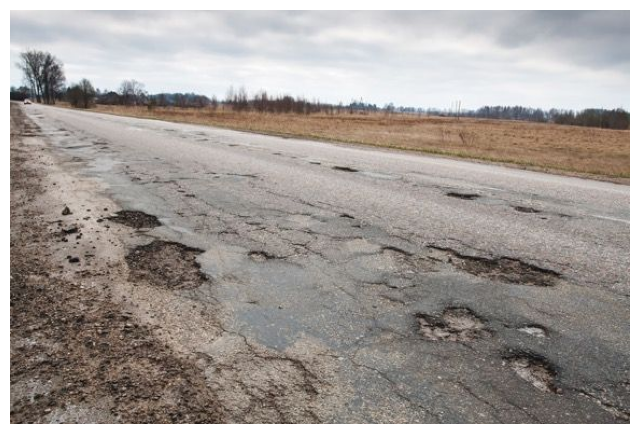

In [40]:
# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(predicted_img)
plt.axis('off')  # Hide axes
plt.show()

In [42]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/final_pothole_detection/best.pt conf=0.25 source='/content/drive/MyDrive/final_pothole_detection/vid2.mp4' save=True

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 1 Potholes, 136.8ms
video 1/1 (2/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 1 Potholes, 25.0ms
video 1/1 (3/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 (no detections), 24.9ms
video 1/1 (4/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 1 Potholes, 25.0ms
video 1/1 (5/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 1 Potholes, 25.0ms
video 1/1 (6/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 (no detections), 25.0ms
video 1/1 (7/1678) /content/drive/MyDrive/final_pothole_detection/vid2.mp4: 640x384 1 Potholes, 17.0ms
video 1/1 (8/1678) /content/drive/MyDrive/final_pothole_de